In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random


In [3]:
df = pd.read_csv("manhattan_rents.csv")
print(df.iloc[20])

rental_id           2172.0
rent                3000.0
bedrooms               0.5
bathrooms              1.0
size_sqft            573.0
min_to_subway         11.0
floor                  8.0
building_age_yrs      31.0
Name: 20, dtype: float64


In [4]:
df.dtypes

rental_id             int64
rent                float64
bedrooms            float64
bathrooms             int64
size_sqft           float64
min_to_subway         int64
floor               float64
building_age_yrs      int64
dtype: object

In [5]:
#dropping the rows with null values
#then converting floats into int 
#dropped rental ID column


df.dropna(axis=0, inplace=True)
df['bedrooms']=df['bedrooms'].astype(int)
df.drop(['rental_id'], axis=1, inplace=True)

In [6]:
print(df)

         rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0      2550.0         0          1      480.0              9    2.0   
1     11500.0         2          2     2000.0              4    1.0   
2      4500.0         1          1      916.0              2   51.0   
3      4795.0         1          1      975.0              3    8.0   
4     17500.0         2          2     4800.0              3    4.0   
...       ...       ...        ...        ...            ...    ...   
3534   4210.0         1          1      532.0              3    8.0   
3535   6675.0         2          2      988.0              5   10.0   
3536   1699.0         0          1      250.0              2    5.0   
3537   3475.0         1          1      651.0              6    5.0   
3538   4500.0         1          1      816.0              4   11.0   

      building_age_yrs  
0                   17  
1                   96  
2                   29  
3                   31  
4                  136

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 0 to 3538
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rent              3536 non-null   float64
 1   bedrooms          3536 non-null   int32  
 2   bathrooms         3536 non-null   int64  
 3   size_sqft         3536 non-null   float64
 4   min_to_subway     3536 non-null   int64  
 5   floor             3536 non-null   float64
 6   building_age_yrs  3536 non-null   int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 207.2 KB


In [8]:
df.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,5139.029977,1.345871,1.366799,939.841346,4.972002,11.909078,52.011312
std,3164.100385,0.969988,0.599685,478.102754,5.515729,10.965099,39.390748
min,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000
25%,3150.000000,1.000000,1.000000,612.750000,2.000000,4.000000,15.000000
50%,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000
75%,6000.000000,2.000000,2.000000,1141.500000,6.000000,17.000000,90.000000
max,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000


In [9]:
adj_rents = []
for row in range(len(df.index)):
    if df.iat[row,1]==0:
        adj_rents.append(df.iat[row,0])
    else:
        adj_rents.append(df.iat[row, 0]/ df.iat[row,1])
        
df['adj_rents'] = adj_rents

In [10]:
df['adj_rents']

0       2550.0
1       5750.0
2       4500.0
3       4795.0
4       8750.0
         ...  
3534    4210.0
3535    3337.5
3536    1699.0
3537    3475.0
3538    4500.0
Name: adj_rents, Length: 3536, dtype: float64

In [11]:
df.describe()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,adj_rents
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,5139.029977,1.345871,1.366799,939.841346,4.972002,11.909078,52.011312,3475.162184
std,3164.100385,0.969988,0.599685,478.102754,5.515729,10.965099,39.390748,1384.649774
min,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,775.000000
25%,3150.000000,1.000000,1.000000,612.750000,2.000000,4.000000,15.000000,2595.000000
50%,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,3325.000000
75%,6000.000000,2.000000,2.000000,1141.500000,6.000000,17.000000,90.000000,4051.250000
max,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,13500.000000


In [12]:
#Data Normalization: Min-Max scaling
#This turns all the values into a number between 0 and 1

# copy the data
dfmms = df.copy()
  
# apply normalization techniques
for column in dfmms.columns:
    dfmms[column] = (dfmms[column] - dfmms[column].min()) / (dfmms[column].max() - dfmms[column].min())    
  
# view normalized data
print(dfmms)

          rent  bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
0     0.066845       0.0        0.2   0.050549       0.209302  0.024096   
1     0.545455       0.4        0.4   0.384615       0.093023  0.012048   
2     0.171123       0.2        0.2   0.146374       0.046512  0.614458   
3     0.186898       0.2        0.2   0.159341       0.069767  0.096386   
4     0.866310       0.4        0.4   1.000000       0.069767  0.048193   
...        ...       ...        ...        ...            ...       ...   
3534  0.155615       0.2        0.2   0.061978       0.069767  0.096386   
3535  0.287433       0.4        0.4   0.162198       0.116279  0.120482   
3536  0.021337       0.0        0.2   0.000000       0.046512  0.060241   
3537  0.116310       0.2        0.2   0.088132       0.139535  0.060241   
3538  0.171123       0.2        0.2   0.124396       0.093023  0.132530   

      building_age_yrs  adj_rents  
0             0.094444   0.139489  
1             0.533333   0.

                      rent  bedrooms  bathrooms  size_sqft  min_to_subway  \
rent              1.000000  0.637936   0.769562   0.857981       0.035131   
bedrooms          0.637936  1.000000   0.720436   0.769800       0.076045   
bathrooms         0.769562  0.720436   1.000000   0.803641       0.086833   
size_sqft         0.857981  0.769800   0.803641   1.000000       0.039339   
min_to_subway     0.035131  0.076045   0.086833   0.039339       1.000000   
floor             0.215904  0.043824   0.128004   0.107194       0.082435   
building_age_yrs -0.128892  0.033770  -0.095453   0.014408      -0.184811   
adj_rents         0.572582 -0.063157   0.147136   0.318212      -0.060081   

                     floor  building_age_yrs  adj_rents  
rent              0.215904         -0.128892   0.572582  
bedrooms          0.043824          0.033770  -0.063157  
bathrooms         0.128004         -0.095453   0.147136  
size_sqft         0.107194          0.014408   0.318212  
min_to_subway   

<Axes: >

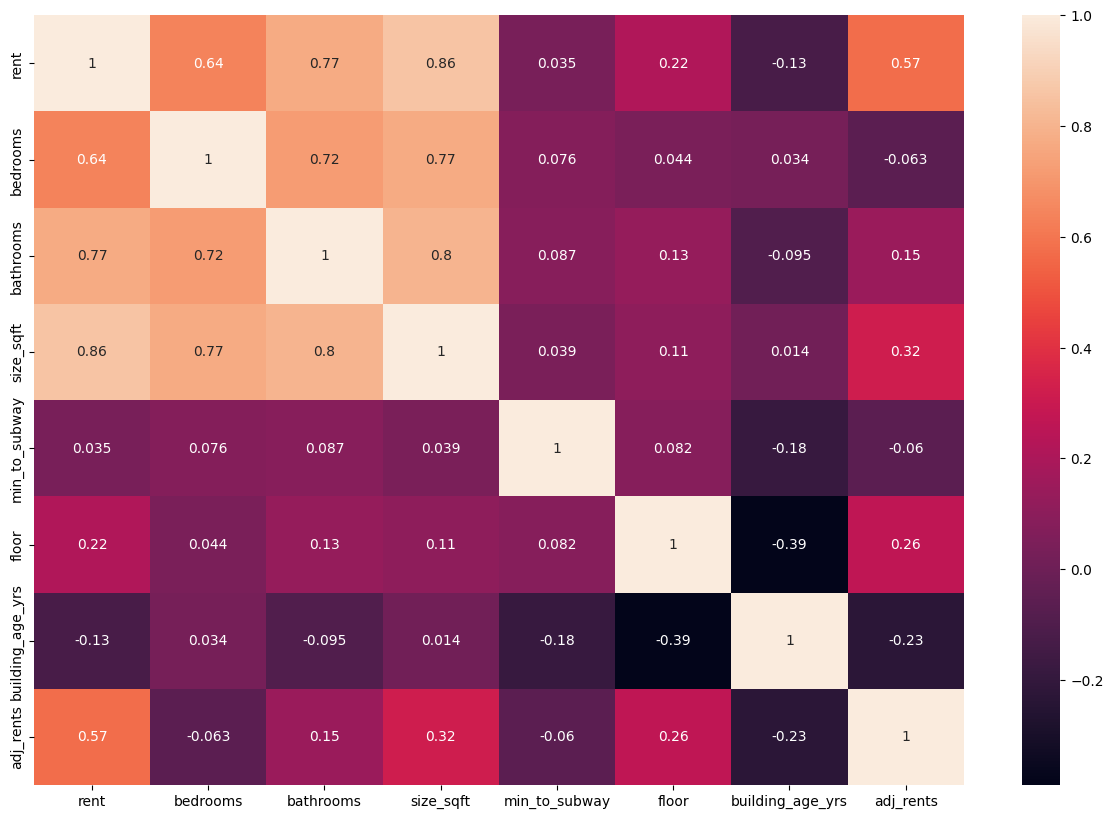

In [13]:
#Finding the correlations between the features and the target
#Any value closer to 1 has a large correlation between those 2 features

cor = df.corr()
print(cor)
plt.figure(figsize= (15,10))
sns.heatmap(cor, annot=True)

In [14]:
#selecting only the features we need and making a new data frame

newdf = pd.DataFrame().assign(size_sqft=dfmms['size_sqft'], bathrooms=dfmms['bathrooms'], bedrooms=dfmms['bedrooms'], rent=dfmms['rent'])
newdf.head()

,size_sqft,bathrooms,bedrooms,rent
0,0.050549,0.2,0.0,0.066845
1,0.384615,0.4,0.4,0.545455
2,0.146374,0.2,0.2,0.171123
3,0.159341,0.2,0.2,0.186898
4,1.000000,0.4,0.4,0.866310


In [15]:
#Splitting new data frame into the 70/30 method

def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [16]:
train, test = testTrainSplit(newdf)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2477
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   size_sqft  2475 non-null   float64
 1   bathrooms  2475 non-null   float64
 2   bedrooms   2475 non-null   float64
 3   rent       2475 non-null   float64
dtypes: float64(4)
memory usage: 96.7 KB


In [17]:
#y = b + w1x1 + w2x2 + w3x3 + wnxn
# https://mathinsight.org/distance_point_plane#:~:text=The%20shortest%20distance%20from%20a,as%20a%20gray%20line%20segment.
# https://www.nagwa.com/en/explainers/235149350980/

# 1. sum = 0
# 2. randomly generate values for b, w1, w2, w3
# 3. calculate distance from points to plane
# 4. add distances to sum
# 5. repeat 2-3 until shortest distance is found 

In [18]:
#sum of distances
def sumOfDistances(b, w1, w2, w3, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        sqft = trainDF.iat[row, 0]
        bathroom = trainDF.iat[row, 1]
        bedroom = trainDF.iat[row, 2]
        distance = abs((w1*sqft) + (w2*bathroom) + (w3*bedroom)+ b) / math.sqrt((w2**2) + (w2**2)+(w3**2))
        sum = sum + distance
    return sum
    

In [26]:
#model
def trainMultipleRegression(trainDF):
    count = 0
    slope = {}
    while count <= 1000:
        b = random.uniform(-1, 1) # y-int!
        w1 = random.uniform(-1, 1) # slope of sqft feature
        w2 = random.uniform(-1, 1) # slope of bathroom feature
        w3 = random.uniform(-1, 1) # slope of bedroom feature
        count = count + 1
        sum = sumOfDistances(b, w1, w2, w3, trainDF)
        slope[w1,w2,w3,b] = sum
    return slope
    

In [144]:
#Prints weights based on the minimum distance - Go through all values in dictionary to find min value
trainslope = trainMultipleRegression(train)

temp = min(trainslope.values())
res = [key for key in trainslope if trainslope[key] == temp]
 
print("w1(sqft): " + str(res[0][0]))
print("w2(bathroom): " + str(res[0][1]))
print("w3(bedroom): " + str(res[0][2]))
print("b: " + str(res[0][3]))

print("Distance: " + str(temp))

w1(sqft): -0.4353927275409848
w2(bathroom): 0.8060541668065435
w3(bedroom): -0.4174927524526122
b: -0.059986500171031354
Distance: 116.00082149360573


In [145]:
#Plugging in values to find prediction
#prediction = -0.071752741805197
#actual = 0.545455
# COMPLETLY OFF

prediction = -0.059986500171031354 + (-0.4353927275409848*0.384) + (0.8060541668065435*0.4) +(-0.4174927524526122 *0.4)

print(prediction)

-0.071752741805197
